In [901]:
# Importing libaries for analytics and numerical functions
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing library to remove warnings
import warnings
warnings.filterwarnings(action='ignore')

In [902]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [903]:
df.shape

(730, 16)

In [904]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [905]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [907]:
df.isnull().mean()
# No missing values in our dataset

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [908]:
# Drop columns not important or relevant for analysis
df=df.drop(["instant","dteday"],axis=1)
df.shape

(730, 14)

In [909]:
# Defining numeric and categorical data and storing them in two separate arrays for data visualization.
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] # Not included registered and casual cols as their total itself is cnt
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [910]:
# Map the labels for categorical columns having more than 2 levels for better interpretation.
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
df['weekday'] = df['weekday'].map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat', 0:'Sun'})
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

In [911]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [912]:
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [913]:
# Converting int dtype of the categorical columns to the categorical dtype
convert_cat_cols = ['yr','holiday','workingday']
for i in convert_cat_cols:
    df[i] = df[i].astype("category")

In [914]:
df.dtypes

season          object
yr            category
mnth            object
holiday       category
weekday         object
workingday    category
weathersit      object
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Data visualization

In [916]:
df['registered'].sum()

2670893

In [917]:
df['casual'].sum()

619952

## Univariate Analysis

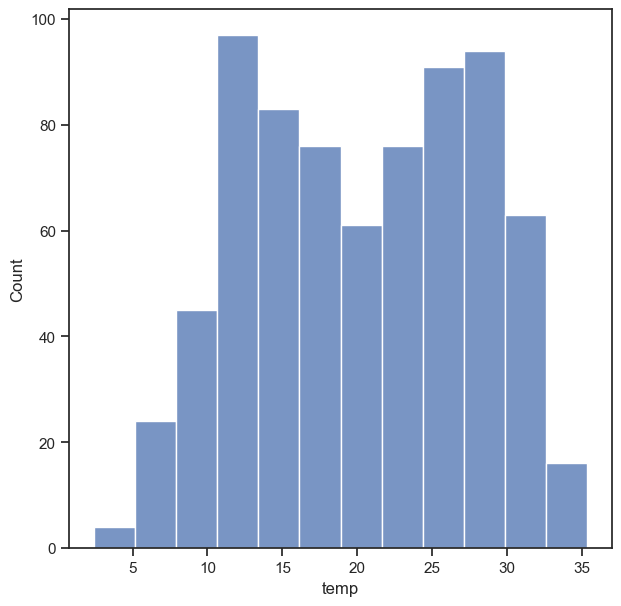

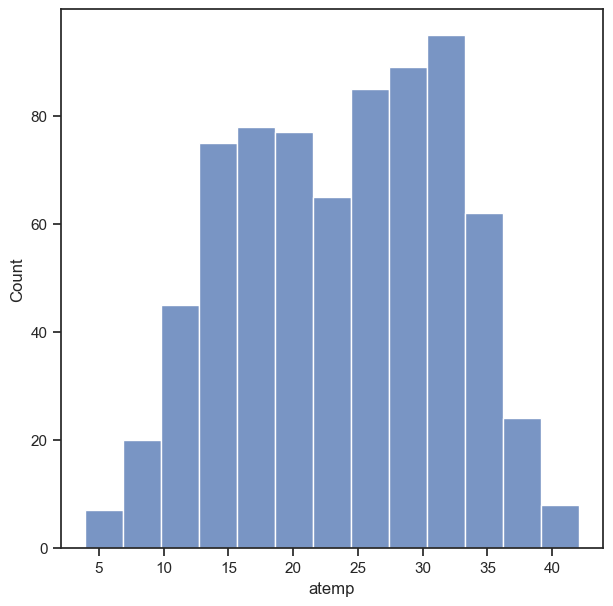

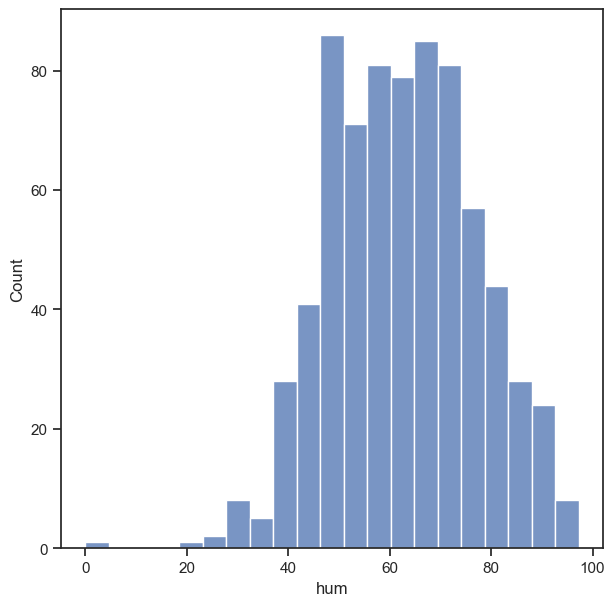

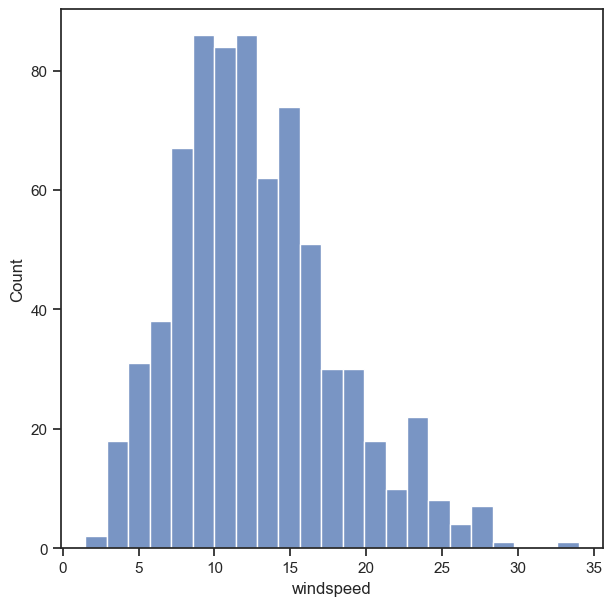

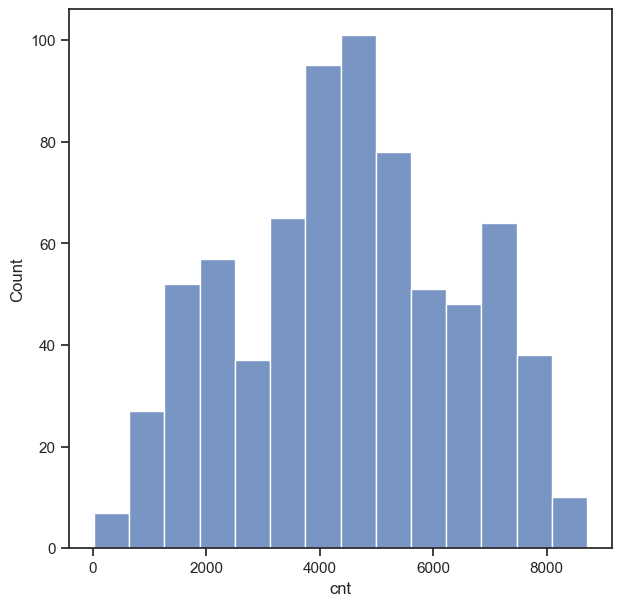

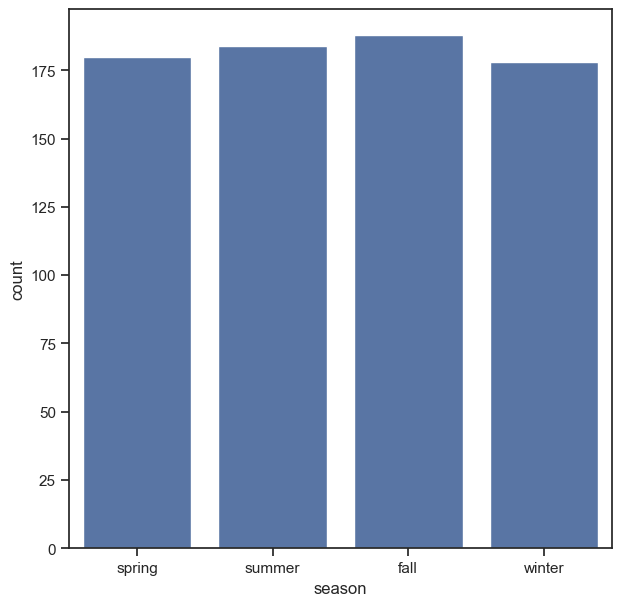

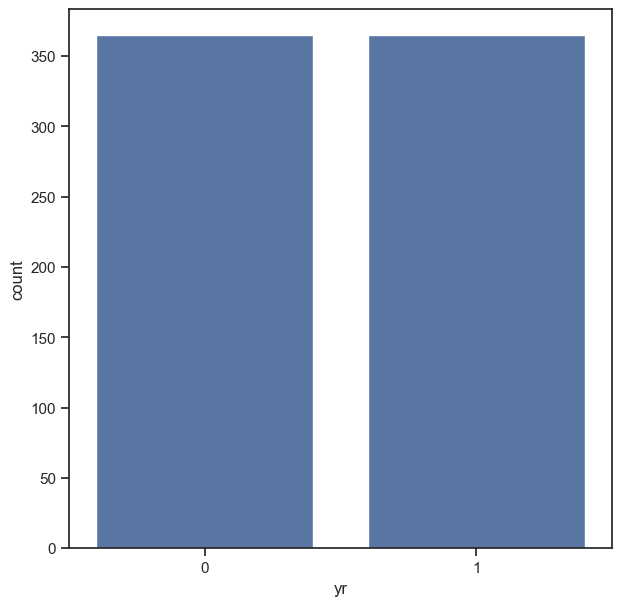

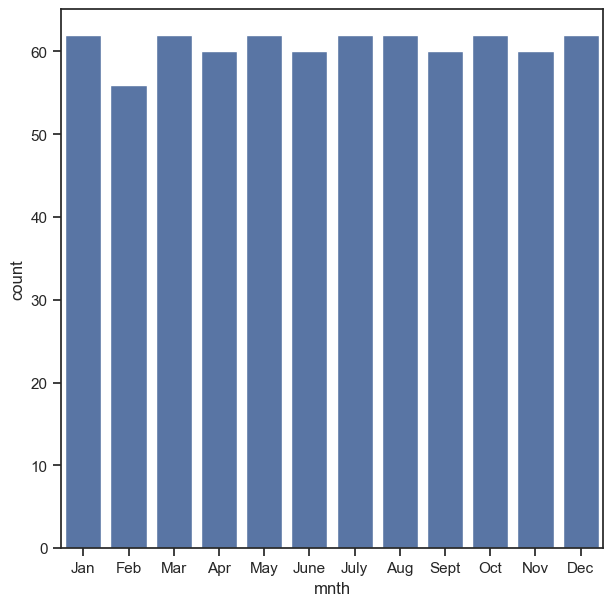

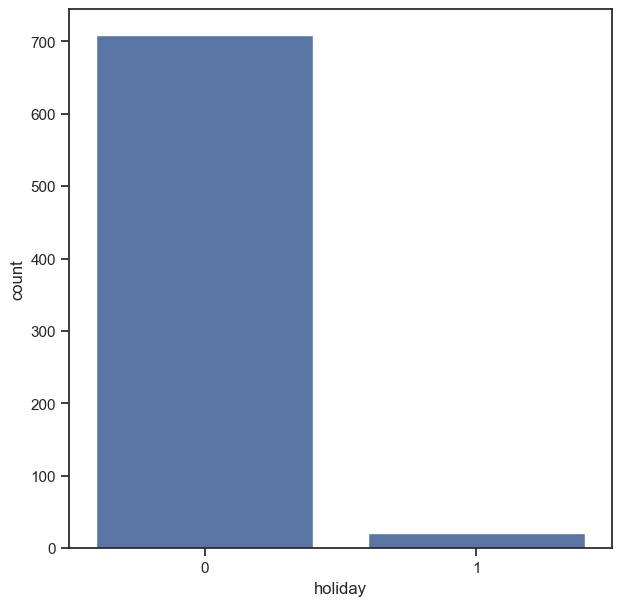

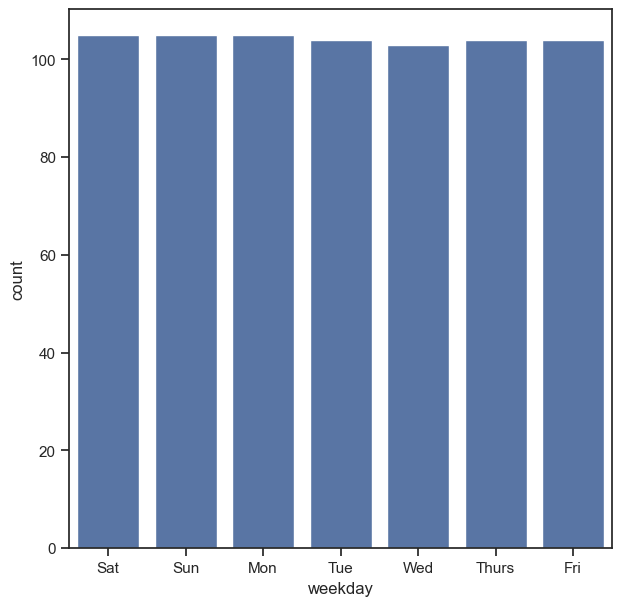

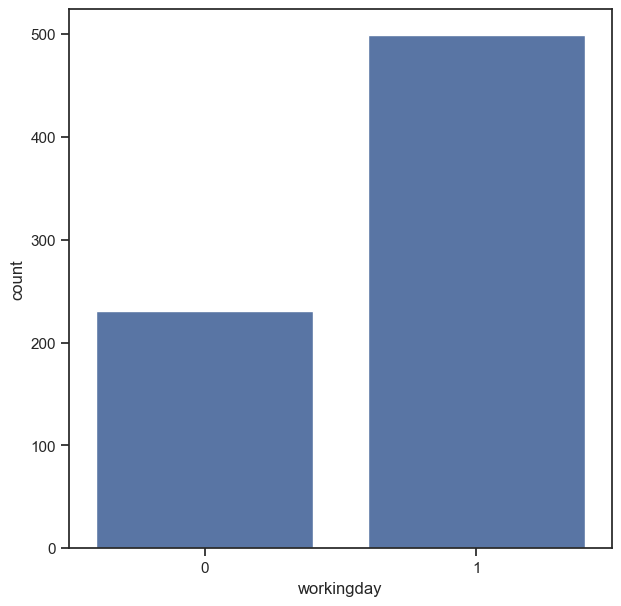

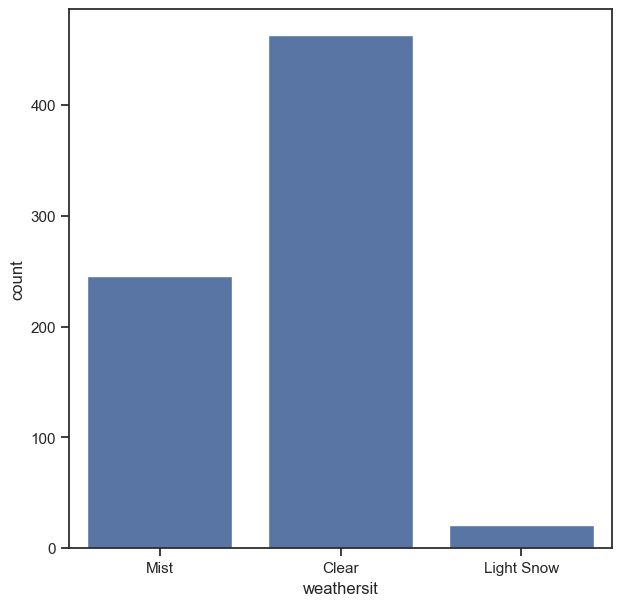

In [919]:
# Histogram plot for numerical variables
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()

# Count plot for categorical variables
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

We can observe below points from the the graphs above:
1. The count of rentals are low below 10 degree celsius and above 32 degree celsius. Thus temp affects the rentals.
2. The hist plot of temp and atemp is very similar.
3. The count of rentals are more for the humidity levels between 45 to 75.
4. The count of rentals are more for the wind speed between 8 to 12.5. Low towards the extremes.
6. The count of rentals are more when holiday is 0
7. The count of rentals are more when working day is 1
8. The count of rentals are more when weather is clear.
9. The total number of registered users contributing towards bike rental is significantly more than the casual users.

## Bivariate Analysis

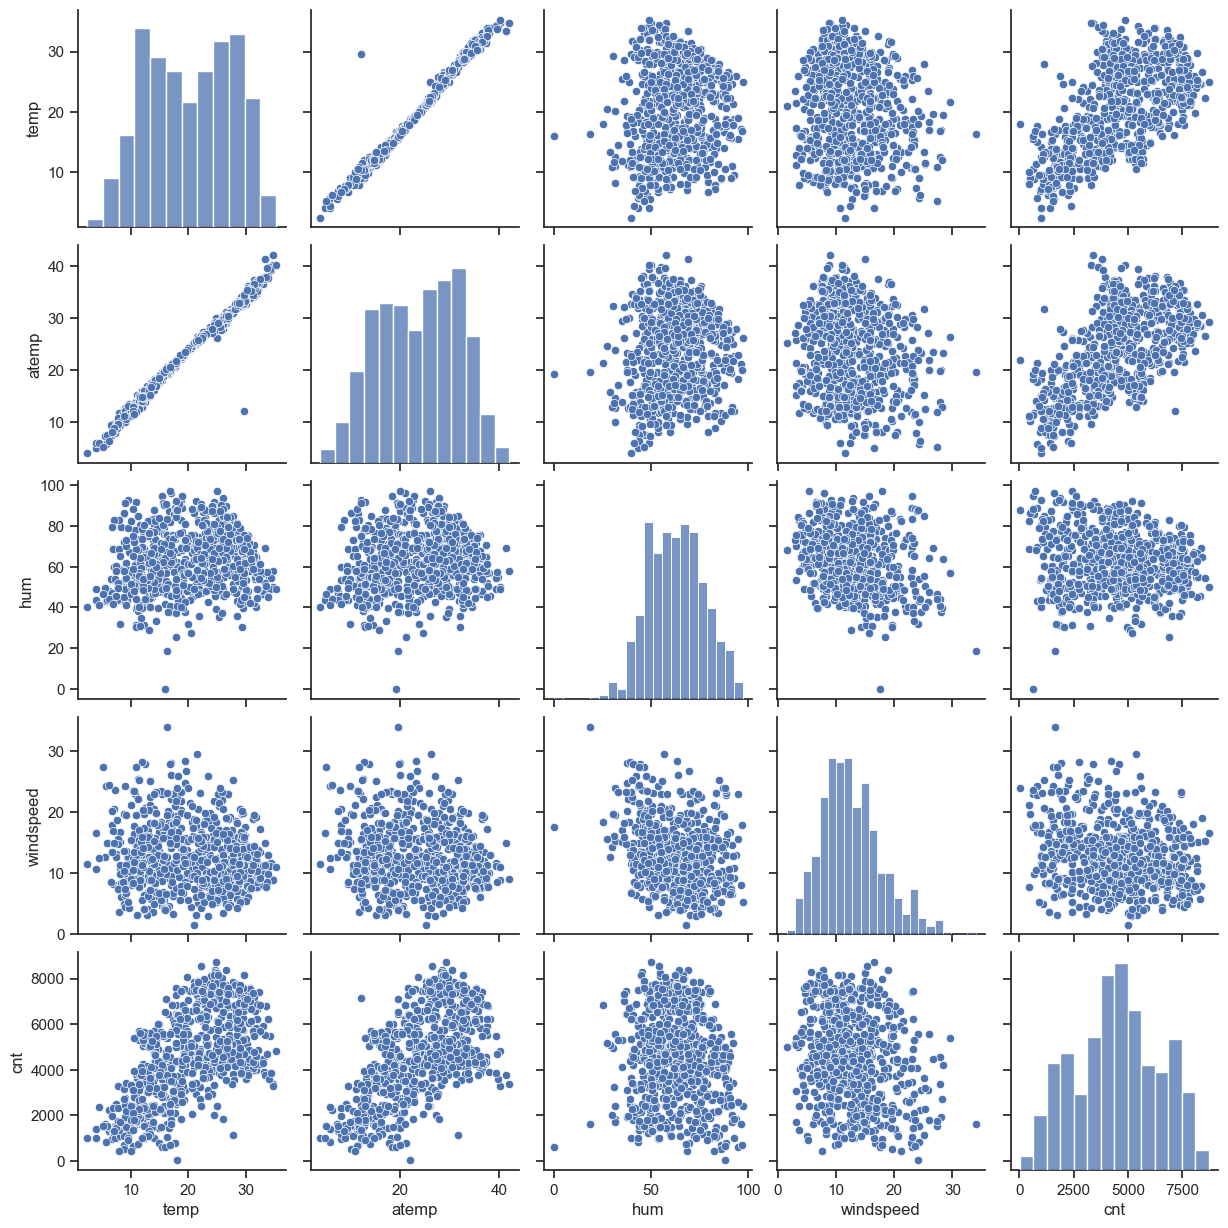

In [922]:
sns.pairplot(df[num_cols])
plt.show()

We can observe below points from the the graphs above:
1. temp and atemp shows linear relationship with the cnt target variable. Hence we can go ahead with building a linear regression model for this case.
2. We can also see that temp and atemp are highly correlated with each other. We can handle them by dropping atemp in data pre-processing phase.

<Axes: xlabel='windspeed', ylabel='cnt'>

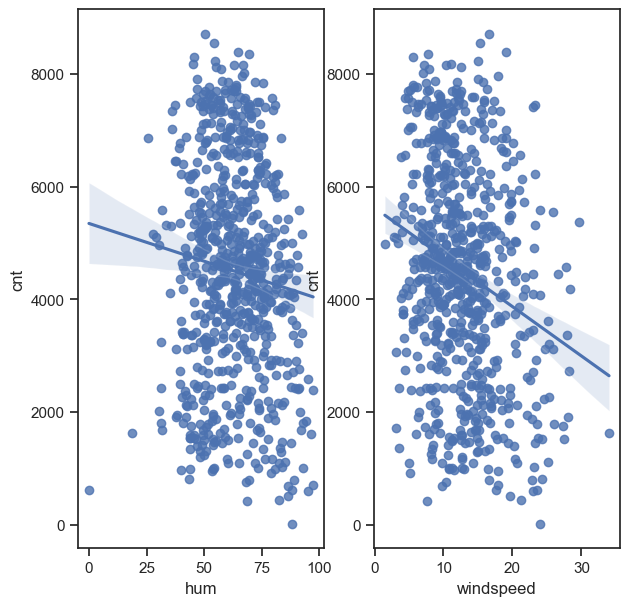

In [924]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.regplot(x="hum",y="cnt",data=df,ax=ax1)
sns.regplot(x="windspeed",y="cnt",data=df,ax=ax2)

We can see that windspeed and humidity shows a slight negative linear relationship.

<Axes: xlabel='yr', ylabel='cnt'>

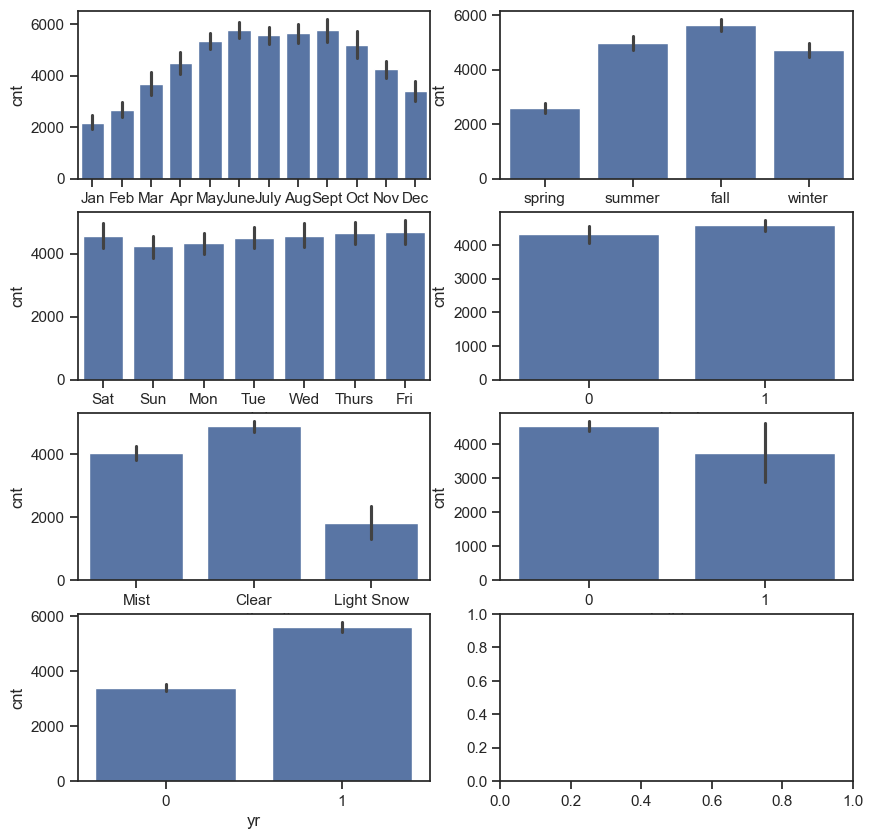

In [926]:
# Analysis of the categorical variables w.r.t dependent variable
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,10)
sns.barplot(df,y="cnt",x="mnth",ax=axes[0][0])
sns.barplot(df,y="cnt",x="season",ax=axes[0][1])
sns.barplot(df,y="cnt",x="weathersit",ax=axes[2][0])
sns.barplot(df,y="cnt",x="weekday",ax=axes[1][0])
sns.barplot(df,y="cnt",x="workingday",ax=axes[1][1])
sns.barplot(df,y="cnt",x="holiday",ax=axes[2][1])
sns.barplot(df,y="cnt",x="yr",ax=axes[3][0])

## Outlier Analysis

[Text(0.5, 0, 'workingday'),
 Text(0, 0.5, 'cnt'),
 Text(0.5, 1.0, 'Boxplot for cnt vs workingday')]

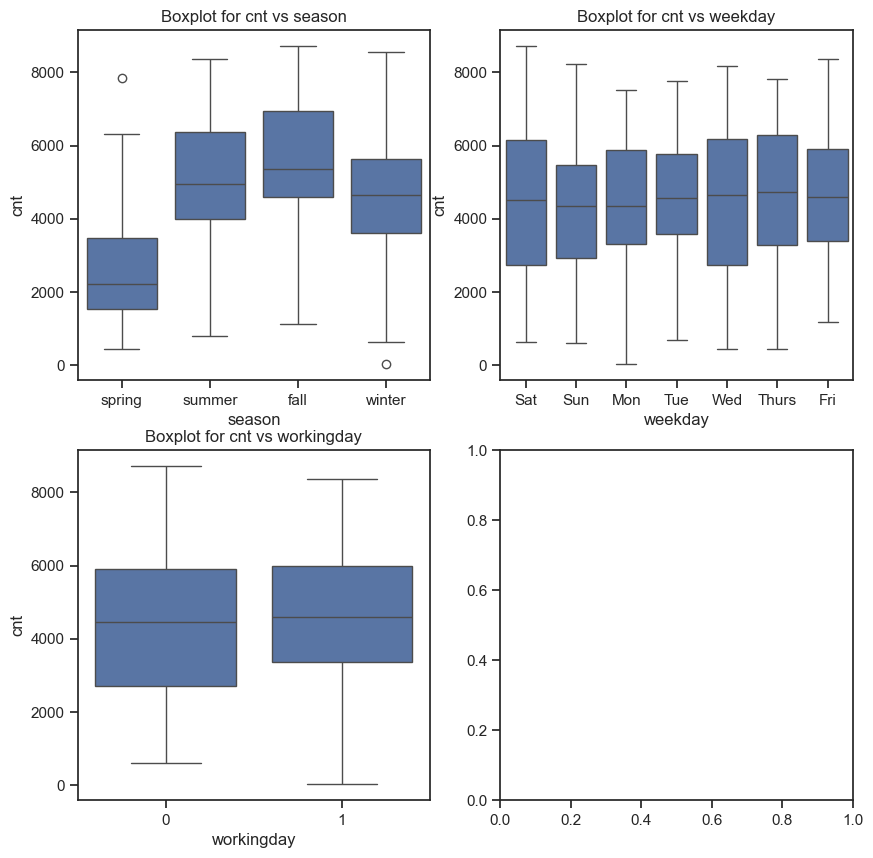

In [928]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
#sns.boxplot(data=df,y="temp",x="mnth",orient='v',ax=axes[0][0])
sns.boxplot(data=df,y="cnt",x="season",orient='v',ax=axes[0][0])
sns.boxplot(data=df,y="cnt",x="weekday",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes[1][0])

#axes[0][0].set(xlabel="mnth", ylabel='temp',title = "Boxplot of temp Vs Month")
axes[0][0].set(xlabel="season",ylabel="cnt",title="Boxplot for cnt vs season")
axes[0][1].set(xlabel="weekday", ylabel="cnt",title="Boxplot for cnt vs weekday")
axes[1][0].set(xlabel="workingday",ylabel="cnt",title="Boxplot for cnt vs workingday")

<font size="4"><b>No major outlier can be observed from the analysis</b></font>

## Multivariate Analysis to check for correlation between the numeric cols

<Axes: >

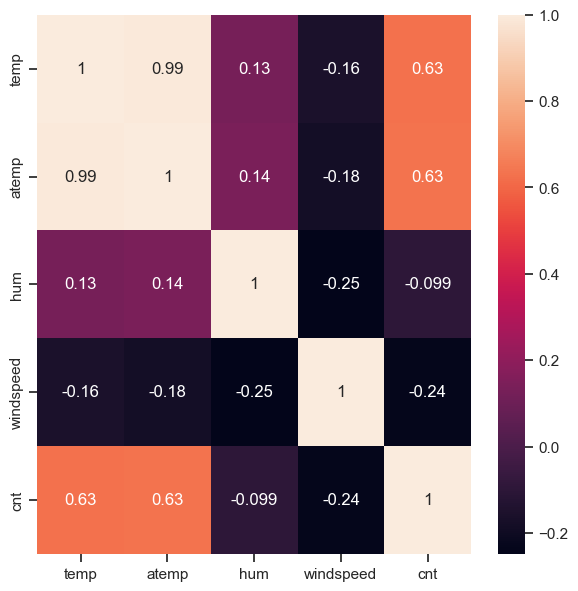

In [931]:
sns.heatmap(df[num_cols].corr(),annot=True)

Observations from above correlation analysis -

1. temp and atemp are highly correlated.
2. temp and atemp have positive and strong coorelation with cnt.
3. hum and windspeed have negative and weak correlation with cnt.

# Pre-Processing Steps
## Dummy Variable Creation (One Hot Encoding)

In [934]:
# Creating dummy variables for Season
dum=pd.get_dummies(df["season"],drop_first=True,dtype=int) #dummies=n-1
dum.shape

(730, 3)

In [935]:
dum1=pd.get_dummies(df["weathersit"],drop_first=True,dtype=int) #dummies=n-1
dum1.shape

(730, 2)

In [936]:
dum2=pd.get_dummies(df["mnth"],drop_first=True,dtype=int) #dummies=n-1
dum2.shape

(730, 11)

In [937]:
dum3=pd.get_dummies(df["weekday"],drop_first=True,dtype=int) #dummies=n-1
dum3.shape

(730, 6)

In [938]:
df1=pd.concat([df,dum,dum1,dum2,dum3],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [939]:
df1=df1.drop(["season",'weathersit','mnth','weekday'],axis=1)
df1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter',
       'Light Snow', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tue',
       'Wed'],
      dtype='object')

In [940]:
df1.shape

(730, 32)

In [941]:
# So far it's clear that atemp amd temp shows high correlation and hence needs to be dropped.
# Also, since casual and registered users doesn't add any new feature to target variable, can also be dropped.
df1=df1.drop(["atemp",'casual','registered'],axis=1)
df1.shape

(730, 29)

## Train-Test Split

In [943]:
X=df1.drop(["cnt"],axis=1) # All of the predictor/Independent variables
y=df1["cnt"] # Target/Dependent variable

In [944]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [945]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed
367,1,0,1,6.150000,44.1250,24.499957,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
648,1,0,1,17.835000,46.3333,12.166932,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
44,0,0,1,17.015000,37.5833,27.999836,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
705,1,0,1,13.154153,76.4167,8.750200,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
379,1,0,0,6.833347,41.9167,16.834286,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [946]:
X_train.shape

(584, 28)

## Scaling

In [948]:
X_train.columns=X_train.columns.astype(str)
X_test.columns=X_test.columns.astype(str)

In [949]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [950]:
scaler = MinMaxScaler()
num_cols = ['temp', 'hum', 'windspeed'] # Normalizing numeical variables
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [951]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)

In [952]:
X_train_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [953]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test_df=pd.DataFrame(X_test,columns=X.columns)
X_test_df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Model 1 (First with all the predictor variables)

In [955]:
from sklearn.linear_model import LinearRegression

In [956]:
# 1. Create an object of linear regression
lm = LinearRegression()

# 2. Fit the model
lm.fit(X_train_df,y_train)

LinearRegression()

In [957]:
lm.intercept_
lm.coef_

array([ 1.99208102e+03, -1.45635400e+14, -1.45635400e+14,  3.89415943e+03,
       -1.24759502e+03, -1.57887182e+03, -4.85254591e+02,  3.65323031e+02,
        9.46785153e+02, -2.29130946e+03, -5.15116397e+02,  1.44175194e+02,
       -4.52845509e+02, -2.50970137e+02, -5.14575291e+02, -3.04435472e+02,
        7.84527299e+01,  2.24879032e+01,  1.56092461e+02, -4.38561299e+02,
        1.11565791e+02,  6.69093337e+02, -2.08790518e+02, -1.45635400e+14,
       -1.45635400e+14, -8.27548276e+01, -1.97053712e+02, -6.16561019e+01])

In [958]:
# 3. Make predictions on training set
y_train_predi = lm.predict(X_train_df)

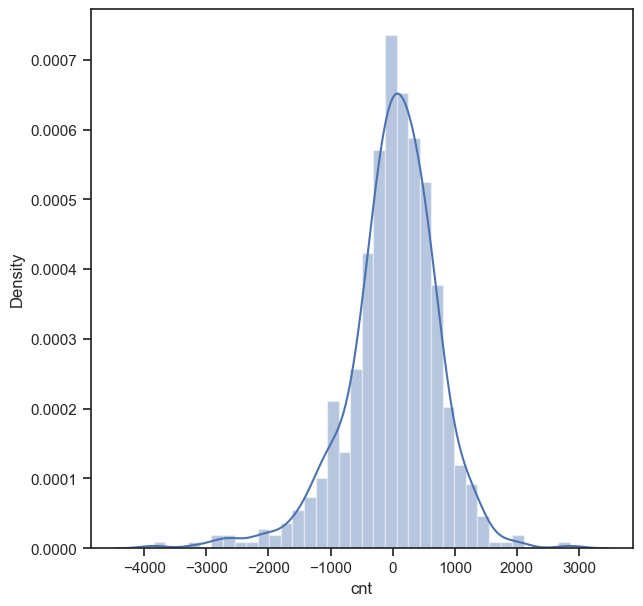

In [959]:
# 4. Residual Analysis
res = y_train - y_train_predi
sns.distplot(res)
plt.show()
# The distribution is approximately normal distribution

In [960]:
# 5. evaluate the model for train set
r2_train_set = r2_score(y_true=y_train, y_pred=y_train_predi) # Calculating R-squared score on train set
r2_train_set

0.8585182436925279

In [961]:
# 6. Make predictions on test set and evaluate
y_test_pred = lm.predict(X_test_df)
r2_test_set = r2_score(y_true=y_test, y_pred=y_test_pred) # Calculating R-squared score on test set
r2_test_set

0.7869880301043287

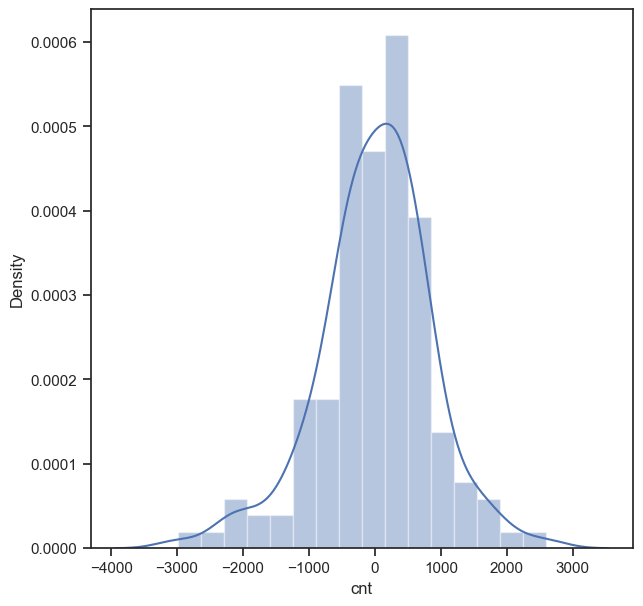

In [962]:
# Residual Analysis on test set
res_test = y_test - y_test_pred
sns.distplot(res_test)
plt.show()
# The distribution is approximately normal distribution

In [963]:
# Adjusted R2 squared for test set
Adj_r2 = 1 - ((1 - r2_test_set) * ((len(X_test_df)-1)/(len(X_test_df)-X.shape[1]-1)))
Adj_r2

0.7360108065395528

In [964]:
# Adjusted R2 squared for test set
Adj_r2 = 1 - ((1 - r2_train_set) * ((len(X_train_df)-1)/(len(X_train_df)-X_train_df.shape[1]-1)))
Adj_r2

0.8513804253562951

Thus we can see that
1. R2 squared of train data set = 0.85
2. Adjusted R2 squared of train data set = 0.85
3. R2 squared of test data set = 0.78
4. Adjusted R2 squared of test data set = 0.73

<font size="4"><b>As we can see that the test set prediction results are not good enough. So we go ahead by eliminating features using RFE</b></font>

In [967]:
# Importing RFE library from sklearn
from sklearn.feature_selection import RFE

## Model 2

In [969]:
# Create another instance of linear regression
lm_model2 = LinearRegression()
#lm_model2.fit(X_train_df,y_train)

rfe = RFE(lm_model2, n_features_to_select=12)
rfe = rfe.fit(X_train_df,y_train)

In [970]:
list(zip(X_train_df.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 2),
 ('Feb', False, 7),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 17),
 ('May', False, 11),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sept', False, 5),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thurs', False, 15),
 ('Tue', False, 10),
 ('Wed', False, 16)]

In [971]:
col = X_train_df.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light Snow', 'Mist', 'July', 'Nov', 'Sat'],
      dtype='object')

In [972]:
# Creating X_test dataframe with RFE selector variables
X_train_rfe = X_train_df[col]

In [973]:
lm_model2_1 = LinearRegression()
lm_model2_1.fit(X_train_rfe,y_train)

LinearRegression()

In [974]:
y_train_pred = lm_model2_1.predict(X_train_rfe)

In [975]:
r2_train_set = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train_set

0.844772913723758

In [976]:
X_test_rfe = X_test_df[col]
y_test_pred = lm_model2_1.predict(X_test_rfe)
r2_test_set = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test_set

0.7803119977476838

In [977]:
# Adjusted R2 for test set
Adj_r2 = 1 - ((1 - r2_test_set) * ((len(X_test_rfe)-1)/(len(X_test_rfe)-X_test_rfe.shape[1]-1)))
Adj_r2

0.7604905238602567

Thus we can see that
1. R2 squared of train data set = 0.84
2. R2 squared of test data set = 0.78
3. Adjusted R2 squared of test data set = 0.76

In [979]:
# Fitting model using Statsmodel to get the summary
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train_rfe)
X_test_sm=sm.add_constant(X_test_rfe)

In [980]:
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.55e-222
Time:                        19:05:11   Log-Likelihood:                -4710.9
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     571   BIC:                             9505.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2492.5871    267.451      9.320      0.000    1967.279    3017.895
yr          1971.9842     65.526     30.095      0.000    1843.283    2100.686
workingday   494.5442     86.118      5.743      0.000     325.398     663.690
temp        4310.7684    249.672     17.266      0.000    3820.380    4801.156
hum        -1270.3368    310.361     -4.093      0.000   -1879.925    -660.749
windspeed  -1517.0205    208.498     -7.276      0.000   -1926.537   -1107.504
spring     -1035.6243    122.269     -8.470      0.000   -1275.777    -795.472
winter       623.3735    105.804      5.892      0.000     415.561     831.186
Light Snow -2200.9501    220.500     -9.982      0.000   -2634.041   -1767.859
Mist        -492.0628     85.899     -5.728      0.000    -660.779    -323.347
July        -764.2513    137.143     -5.573      0.000   -1033.617    -494.886
Nov         -414.8706    140.844     -2.946      0.003    -691.506    -138.235
Sat          577.8803    113.144      5.107      0.000     355.650     800.110
==============================================================================
Omnibus:                       82.214   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.593
Skew:                          -0.714   Prob(JB):                     1.53e-47
Kurtosis:                       5.611   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [981]:
# p-values of all the predictors is 0 so next checking the VIF to find the multicollinearity issue if any.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
X_train_sm_vif = X_train_sm.drop(['const'],axis=1)
vif_data["Feature"]=X_train_sm_vif.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm_vif.values,i) 
                 for i in range(len(X_train_sm_vif.columns))]
vif_data

,Feature,VIF
0,yr,2.064966
1,workingday,4.426994
2,temp,15.909399
3,hum,23.597990
4,windspeed,4.229863
5,spring,2.712996
6,winter,2.498703
7,Light Snow,1.201138
8,Mist,2.251588
9,July,1.359856


<font size="4"><b>As we can see that the p-value of all the variables are within the cut off range i.e 0.05. However, the VIF for humididty is highest (cut off <=5). Hence we can try to remove this variable and check if the performance is improved or no.</b></font>

In [983]:
X_train_sm=X_train_sm.drop(["hum"],axis=1)
X_test_sm=X_test_sm.drop(["hum"],axis=1)

In [984]:
# Fit the model again after removing hum variable as it has high correlation with temp variable.
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     273.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.67e-219
Time:                        19:05:11   Log-Likelihood:                -4719.4
No. Observations:                 584   AIC:                             9463.
Df Residuals:                     572   BIC:                             9515.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1779.9707    205.801      8.649      0.000    1375.754    2184.188
yr          2007.8625     65.825     30.503      0.000    1878.574    2137.151
workingday   509.1372     87.221      5.837      0.000     337.825     680.449
temp        4080.2236    246.563     16.548      0.000    3595.945    4564.502
windspeed  -1271.9141    202.445     -6.283      0.000   -1669.540    -874.289
spring     -1059.9142    123.795     -8.562      0.000   -1303.063    -816.765
winter       548.8399    105.651      5.195      0.000     341.330     756.350
Light Snow -2561.3145    204.926    -12.499      0.000   -2963.813   -2158.816
Mist        -698.3024     70.520     -9.902      0.000    -836.811    -559.793
July        -702.0231    138.161     -5.081      0.000    -973.389    -430.658
Nov         -393.2341    142.670     -2.756      0.006    -673.455    -113.014
Sat          602.9312    114.524      5.265      0.000     377.992     827.870
==============================================================================
Omnibus:                       83.091   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.897
Skew:                          -0.722   Prob(JB):                     4.83e-48
Kurtosis:                       5.621   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [985]:
vif_data=pd.DataFrame()
X_train_sm_vif = X_train_sm.drop(['const'],axis=1)
vif_data["Feature"]=X_train_sm_vif.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm_vif.values,i) 
                 for i in range(len(X_train_sm_vif.columns))]
vif_data

,Feature,VIF
0,yr,2.061615
1,workingday,4.287260
2,temp,6.033743
3,windspeed,4.226173
4,spring,1.837293
5,winter,1.943683
6,Light Snow,1.075167
7,Mist,1.538365
8,July,1.319488
9,Nov,1.501980


In [986]:
X_train_rfe=X_train_rfe.drop(["hum"],axis=1)
X_test_rfe=X_test_rfe.drop(["hum"],axis=1)

## The VIF values are significantly reduced after dropping hum column. However VIF for temp is still above the cut off 5. Hence further improving the model.

In [988]:
# Dropping working day column as it has higher correlation with some other predictor variable.
X_train_sm=X_train_sm.drop(["workingday"],axis=1)
X_test_sm=X_test_sm.drop(["workingday"],axis=1)
X_train_rfe=X_train_rfe.drop(["workingday"],axis=1)
X_test_rfe=X_test_rfe.drop(["workingday"],axis=1)

In [989]:
# Fitting the model once again after dropping workingday column
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     281.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.42e-213
Time:                        19:05:11   Log-Likelihood:                -4736.3
No. Observations:                 584   AIC:                             9495.
Df Residuals:                     573   BIC:                             9543.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2154.5745    201.104     10.714      0.000    1759.584    2549.565
yr          2011.9690     67.695     29.721      0.000    1879.009    2144.929
temp        4115.8626    253.501     16.236      0.000    3617.958    4613.767
windspeed  -1260.8427    208.196     -6.056      0.000   -1669.764    -851.922
spring     -1077.0216    127.283     -8.462      0.000   -1327.019    -827.024
winter       546.3482    108.656      5.028      0.000     332.935     759.761
Light Snow -2491.1401    210.394    -11.840      0.000   -2904.378   -2077.902
Mist        -671.7604     72.375     -9.282      0.000    -813.914    -529.607
July        -730.0568    142.007     -5.141      0.000   -1008.975    -451.139
Nov         -430.4339    146.583     -2.936      0.003    -718.340    -142.528
Sat          202.2651     94.285      2.145      0.032      17.079     387.451
==============================================================================
Omnibus:                       89.583   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.522
Skew:                          -0.808   Prob(JB):                     4.31e-47
Kurtosis:                       5.483   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [990]:
vif_data=pd.DataFrame()
X_train_sm_vif = X_train_sm.drop(['const'],axis=1)
vif_data["Feature"]=X_train_sm_vif.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm_vif.values,i) 
                 for i in range(len(X_train_sm_vif.columns))]
vif_data

,Feature,VIF
0,yr,2.057826
1,temp,4.318853
2,windspeed,4.130685
3,spring,1.685851
4,winter,1.875701
5,Light Snow,1.070250
6,Mist,1.512234
7,July,1.310611
8,Nov,1.501976
9,Sat,1.177684


## As can be seen, after dropping workingday the VIF of all the variables is now under 5.

In [992]:
# Dropping column Nov as it looks like it is not much significant and thus improving the model.
X_train_sm=X_train_sm.drop(["Nov"],axis=1)
X_test_sm=X_test_sm.drop(["Nov"],axis=1)
X_train_rfe=X_train_rfe.drop(["Nov"],axis=1)
X_test_rfe=X_test_rfe.drop(["Nov"],axis=1)

In [993]:
# Fitting the model once again after dropping Nov column
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     307.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.62e-213
Time:                        19:05:12   Log-Likelihood:                -4740.6
No. Observations:                 584   AIC:                             9501.
Df Residuals:                     574   BIC:                             9545.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2077.1381    200.687     10.350      0.000    1682.968    2471.308
yr          2013.2801     68.141     29.546      0.000    1879.444    2147.116
temp        4235.8460    251.842     16.819      0.000    3741.202    4730.491
windspeed  -1293.2395    209.280     -6.179      0.000   -1704.287    -882.192
spring     -1029.7512    127.096     -8.102      0.000   -1279.381    -780.121
winter       431.7052    102.071      4.229      0.000     231.227     632.183
Light Snow -2463.0378    211.567    -11.642      0.000   -2878.579   -2047.497
Mist        -658.8039     72.719     -9.060      0.000    -801.631    -515.976
July        -751.7223    142.754     -5.266      0.000   -1032.106    -471.339
Sat          210.0825     94.871      2.214      0.027      23.746     396.419
==============================================================================
Omnibus:                       90.795   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.495
Skew:                          -0.815   Prob(JB):                     3.58e-48
Kurtosis:                       5.515   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [994]:
vif_data=pd.DataFrame()
X_train_sm_vif = X_train_sm.drop(['const'],axis=1)
vif_data["Feature"]=X_train_sm_vif.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm_vif.values,i) 
                 for i in range(len(X_train_sm_vif.columns))]
vif_data

,Feature,VIF
0,yr,2.057719
1,temp,4.277935
2,windspeed,4.072095
3,spring,1.682371
4,winter,1.387655
5,Light Snow,1.068463
6,Mist,1.510499
7,July,1.309242
8,Sat,1.177259


## As can be seen dropping Nov column does not affect the model performance significantly.

In [996]:
# Dropping column Sat as it looks like it is not much significant. Also it's p-value is not 0 though not exceeding cut off, still, let's see.
X_train_sm=X_train_sm.drop(["Sat"],axis=1)
X_test_sm=X_test_sm.drop(["Sat"],axis=1)
X_train_rfe=X_train_rfe.drop(["Sat"],axis=1)
X_test_rfe=X_test_rfe.drop(["Sat"],axis=1)

In [997]:
# Fitting the model once again after dropping Sat column
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     342.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.35e-213
Time:                        19:05:12   Log-Likelihood:                -4743.1
No. Observations:                 584   AIC:                             9504.
Df Residuals:                     575   BIC:                             9544.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2107.8435    200.885     10.493      0.000    1713.285    2502.402
yr          2007.4339     68.321     29.383      0.000    1873.245    2141.622
temp        4229.4686    252.679     16.739      0.000    3733.182    4725.755
windspeed  -1270.9599    209.746     -6.060      0.000   -1682.922    -858.998
spring     -1031.4293    127.524     -8.088      0.000   -1281.900    -780.959
winter       431.7721    102.417      4.216      0.000     230.616     632.929
Light Snow -2458.4724    212.274    -11.582      0.000   -2875.400   -2041.545
Mist        -658.3670     72.965     -9.023      0.000    -801.677    -515.057
July        -746.4820    143.218     -5.212      0.000   -1027.776    -465.188
==============================================================================
Omnibus:                       83.555   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.012
Skew:                          -0.738   Prob(JB):                     1.51e-46
Kurtosis:                       5.548   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [998]:
vif_data=pd.DataFrame()
X_train_sm_vif = X_train_sm.drop(['const'],axis=1)
vif_data["Feature"]=X_train_sm_vif.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm_vif.values,i) 
                 for i in range(len(X_train_sm_vif.columns))]
vif_data

,Feature,VIF
0,yr,2.055641
1,temp,4.232104
2,windspeed,4.042040
3,spring,1.675431
4,winter,1.383355
5,Light Snow,1.068309
6,Mist,1.510032
7,July,1.309189


## As can be seen the R squared value is not affected much and also now we have reduced our predictors to 8 variables.

In [1107]:
# Predicting test values for the final model using sklearn library
# 1. Create an object of linear regression
lm_f = LinearRegression()

# 2. Fit the model
lm_f.fit(X_train_rfe,y_train)

LinearRegression()

In [1001]:
y_train_pred = lm_f.predict(X_train_rfe)

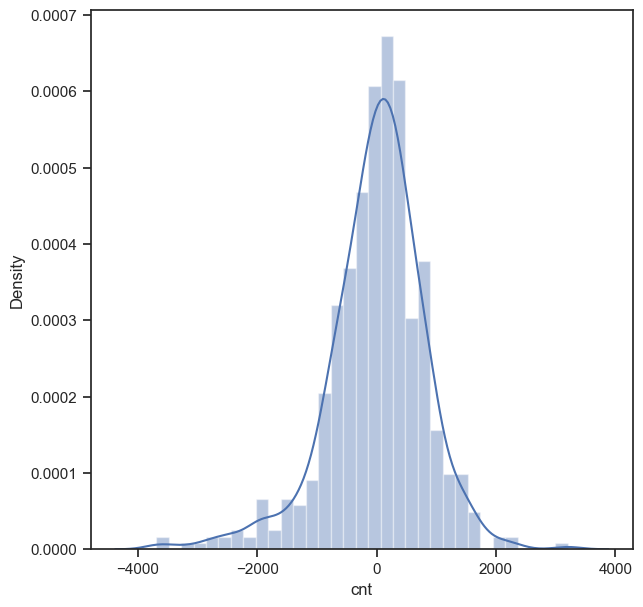

In [1002]:
# Residual Analysis on train set
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

In [1003]:
# R2 score on train set of final model
r2_train_set = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train_set

0.8266843629826668

In [1004]:
# Adjusted R-squared value on train set of final model
Adj_r2 = 1 - ((1 - r2_train_set) * ((len(X_train_rfe)-1)/(len(X_train_rfe)-X_train_rfe.shape[1]-1)))
Adj_r2

0.8242730149893822

In [1005]:
y_test_pred = lm_f.predict(X_test_rfe)

# R2 score on test set of final model
r2_test_set = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test_set

0.7783161914468113

In [1006]:
# Adjusted R-squared value for test set
Adj_r2 = 1 - ((1 - r2_test_set) * ((len(X_test_rfe)-1)/(len(X_test_rfe)-X_test_rfe.shape[1]-1)))
Adj_r2

0.7653711515312966

Thus we see that,
1. R2 score on train set of final model = 0.82
2. Adjusted R-squared on train set of final model = 0.82
3. R2 score on test set of final model = 0.77
4. Adjusted R-squared on train set of final model = 0.76
These values are fairly comparable.

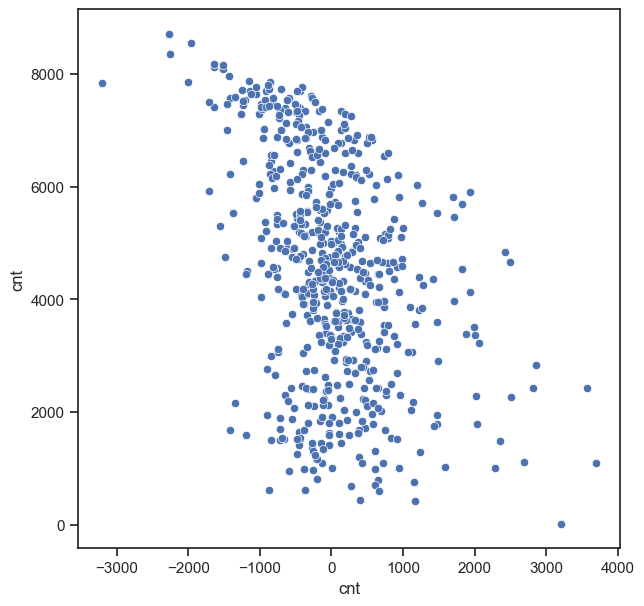

In [1008]:
# Plotting scatterplot of residuals against y_train
sns.scatterplot(x=y_train_pred-y_train, y=y_train)
plt.show()

## As you can see above the residuals are scattered around the mean 0. Thus following properties of normal distribution which also validates our model.

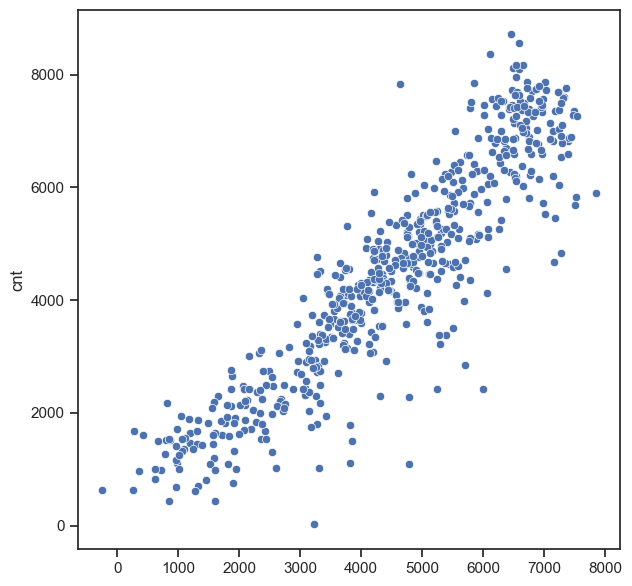

In [1010]:
# Plotting scatterplot of fitted values against actual values
sns.scatterplot(x=y_train_pred, y=y_train)
plt.show()

## Above graph further validates our model as it shows linear relationship

<Axes: xlabel='cnt'>

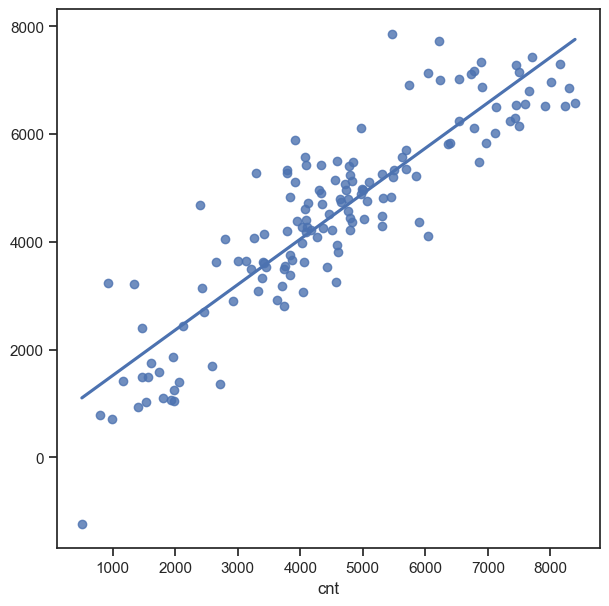

In [1012]:
# Plotting regression plot to show our model's fit line.
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(7, 7)})
sns.regplot(x=y_test, y=y_test_pred, ci=None, color="b")

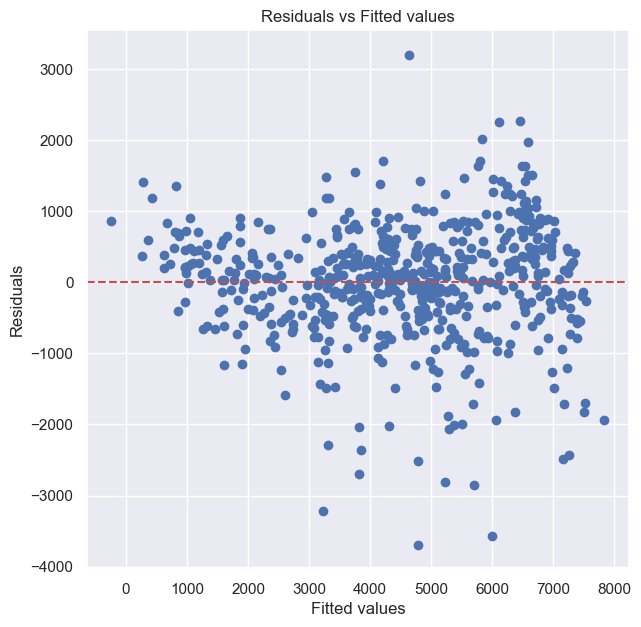

In [1013]:
fitted_values = y_train_pred
residuals = y_train - y_train_pred

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

<font size="4">Residuals vs Fitted values plot above validates Linearity of this model as the residuals are randomly scattered around zero. Hence the linearity assumption holds.</font>

In [1015]:
# Get the absolute values of the coefficients
coef_abs = np.abs(res2.params)
# Remove the intercept (constant) term
coef_abs = coef_abs.drop('const')

# Identify the top 3 features
top_3_features = coef_abs.nlargest(3).index
print("Top 3 features based on absolute values of coefficients:", top_3_features)

Top 3 features based on absolute values of coefficients: Index(['temp', 'Light Snow', 'yr'], dtype='object')


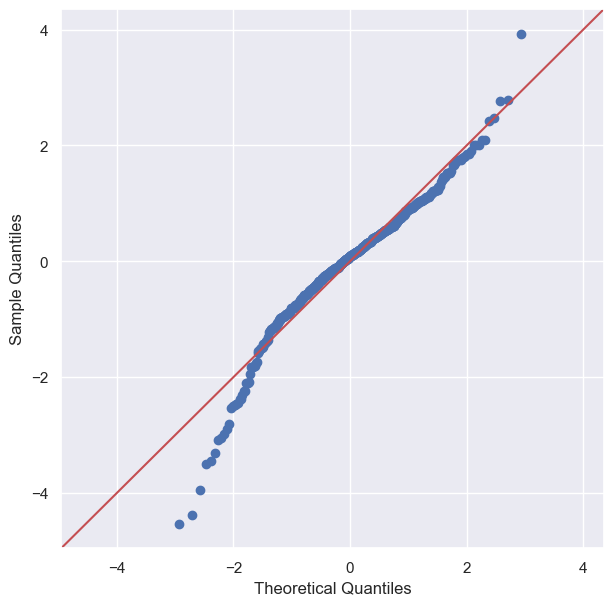

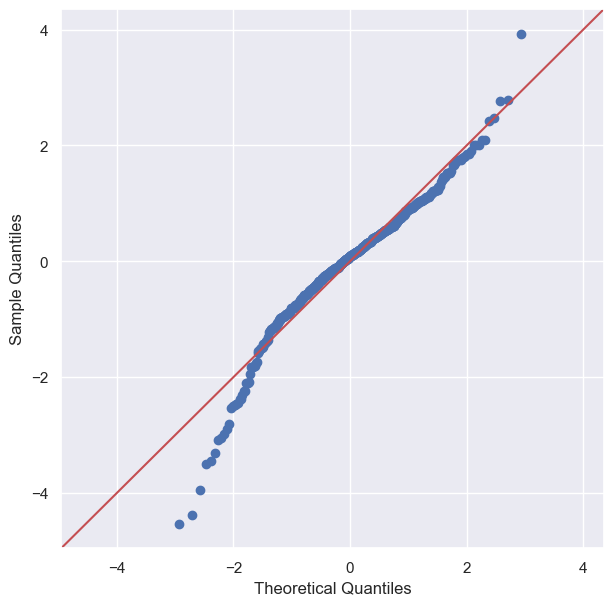

In [1016]:
sm.qqplot(residuals, line = "45", fit = True)

## Above Q-Q plot further validates our assumptions of linear model.

# Linear Regression Model (Line of best fit)
Y=2007.43*yr+4229.46*temp-1270.95*windspeed-1031.42*spring+431.77*winter-2458.47*Light snow
-658.36*Mist-748*july+2107.84

Thus, the variables significant in predicting the demand for shared bikes are temperature, weather situation such as light snow, year, windspeed, season of spring, season of winter, mist and the month of July

How well those variables describe the bike demands - R- squared value of 82%